<center><h1><u><i>TASK 2 - QUANT CLUB SELECTIONS</u></h1></center></i>
<h3>NAME:AAYUSH SRIVASTAVA<br>ROLL NO: 23AG10003<br>
MAIL-aayush.srivastava0307@gmail.com
</h3>

My Choice for Nifty 50 company for technical analysis would be Hindustan Unilever Ltd. (HINDUNILVR)<br>
Reason for my choice is that it is a blue chip company and as per my research it has shown less volatiltity.<br>
According to the LV30 index , it has a volatility value of 3.06 over the past 3 months.<br>
I will access the data for ~12 month period, during Covid Time ie from 2020 onwards,<br>
I will try  to show how covid had impacted the economy and how the tug of war between the buyers and sellers gets affected during such external factors.<br>
Refer - 2020 stock market crash-https://en.wikipedia.org/wiki/2020_stock_market_crash <br>
Reference Blog-https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

<h1>Extracting Data </h1>

Sample Code for extracting data for 5 days this year
Note-yahoo finance may not have all days data <br>
>
Reference Blog-https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

In [1]:
import yfinance as yf
#here i will extract the data the ticker symbol is "HINDUNILVR.NS"
sampledata = yf.download("HINDUNILVR.NS", start="2024-01-01", end="2024-01-6",auto_adjust=True)
#here auto adjust ensures that all columns come in 1 single line 
sampledata

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,2663.850098,2669.399902,2638.000000,2654.750000,526353
2024-01-02,2648.000000,2653.949951,2607.000000,2613.800049,1310629
2024-01-03,2599.000000,2628.600098,2595.550049,2606.550049,1008270
2024-01-04,2606.550049,2623.000000,2588.050049,2592.550049,1376844
2024-01-05,2595.000000,2629.899902,2595.000000,2620.050049,1150738


However I  will use pandas library and extract data in csv file for better managmenet.<br>
Reference Blog-https://learndataanalysis.org/source-code-download-historical-stock-data-from-yahoo-finance-using-python/ <br>
Referred Video-https://youtu.be/NjEc7PB0TxQ

In [2]:
import time
import datetime
import pandas as pd

ticker = 'HINDUNILVR.NS'
period1 = int(time.mktime(datetime.datetime(2020, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 1, 1, 23, 59).timetuple()))
interval = '1d' #'1wk' for 1 week if needed
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string) # data is our dataframe
# here i dropped the adj close column since we wont be needing it
data.drop("Adj Close", axis=1, inplace=True)
print(data.round(2)) #rounding data for a cleaner view
#make sure to view the ouput as a scollable element if you are using VSCode

           Date     Open     High      Low    Close   Volume
0    2020-01-01  1930.00  1939.90  1918.00  1936.55   543035
1    2020-01-02  1940.00  1952.60  1930.00  1938.05   663275
2    2020-01-03  1937.90  1940.00  1918.75  1927.45  1598825
3    2020-01-06  1927.35  1929.40  1911.25  1915.45   683129
4    2020-01-07  1919.25  1931.00  1918.00  1920.70   808935
..          ...      ...      ...      ...      ...      ...
247  2020-12-28  2405.00  2417.40  2376.05  2388.90  1532477
248  2020-12-29  2395.00  2403.00  2354.20  2384.30  1749013
249  2020-12-30  2390.00  2414.65  2376.00  2406.60  1924886
250  2020-12-31  2396.00  2417.00  2387.00  2395.40  1709836
251  2021-01-01  2395.40  2404.00  2382.00  2387.55   830096

[252 rows x 6 columns]


<h1>Graph</h1>

Following is a simple graph of the closing stock price of the data using matplot lib.

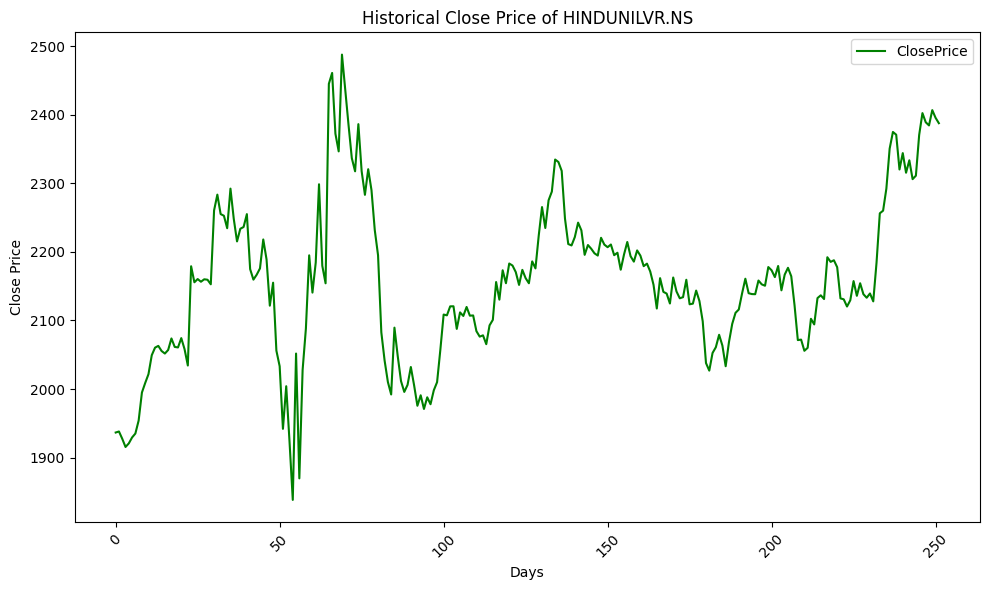

In [3]:
import matplotlib.pyplot as plt
# plotting days against the close price column fromn our data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='ClosePrice', color='green')
plt.title('Historical Close Price of HINDUNILVR.NS')
plt.xlabel('Days')
plt.ylabel('Close Price')
# we will rotate the x axis items so that they dont overlap and create a mess
plt.xticks(rotation=45)
plt.tight_layout() #for decluttering
plt.legend()
plt.show()


from the above graph it is evident that we are able to see a decline in the stock market value of Hindustan Unilever Ltd. This indicates the effect on COVID on the market, stocks droped from 2200 to 1900 in value in this time frame of Feb to March but they also came back up

<h1> Technical Indicators </h1>

Now it time to implement some technical indicators, the first one that we'll use is the easiest it is the Simple Moving Average or (SMA)<br>
We could direcly use the rolling function in pandas library but i'll code it from scratch<br>

<h3>1. Simple Moving Average or SMA</h3>

SMA is basically average of  x days of stock(or data points) , obviously it has no meaning if we are calculating for the first x days, it will start making sense in the x+1th day, using basic loops logic we can achieve this.
Note- yahoo finance doesnt give every days data so we'll work with x data points logic

In [4]:
windowsize = 7
malist = [] #moving average list

for i in range(len(data)): # will start from the zeroth day index =0
    if i < windowsize-1:
        malist.append(None)  # here there will be no moving avg for the first 7 days 
    else:
        sumofclosingstock = sum(data['Close'][i - windowsize+1  : i +1])
        ma = sumofclosingstock / windowsize
        malist.append(ma)

data['SMA'] = malist
data['SMA']=data['SMA'].round(2)
data=data.round(2) 
#can also use print(data.to_string(line_width=10000)) to print data in one line
data

,Date,Open,High,Low,Close,Volume,SMA
0,2020-01-01,1930.00,1939.90,1918.00,1936.55,543035,NaN
1,2020-01-02,1940.00,1952.60,1930.00,1938.05,663275,NaN
2,2020-01-03,1937.90,1940.00,1918.75,1927.45,1598825,NaN
3,2020-01-06,1927.35,1929.40,1911.25,1915.45,683129,NaN
4,2020-01-07,1919.25,1931.00,1918.00,1920.70,808935,NaN
...,...,...,...,...,...,...,...
247,2020-12-28,2405.00,2417.40,2376.05,2388.90,1532477,2346.74
248,2020-12-29,2395.00,2403.00,2354.20,2384.30,1749013,2356.60
249,2020-12-30,2390.00,2414.65,2376.00,2406.60,1924886,2367.05
250,2020-12-31,2396.00,2417.00,2387.00,2395.40,1709836,2379.83


We can verify that our code is correct by checking with the inbuilt pandas function

In [5]:
#here using inbuilt function
windowsize = 7
data['SMA'] = data['Close'].rolling(window=windowsize).mean()
data['SMA']=data['SMA'].round(2)
print(data['SMA'])


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
247    2346.74
248    2356.60
249    2367.05
250    2379.83
251    2390.76
Name: SMA, Length: 252, dtype: float64


<h3>
2. Exponential Moving Average EMA </h3>

For my next technical indicator i'll use the exponential moving average (EMA)<br>
basically ema gives more weightage to the most recent data points <br>
Reference-https://www.investopedia.com/terms/e/ema.asp <br>
ema can be simply calculated from sma initial value and a smoothing factor (constant to give weightage)

Formula Used=><br>
EMAToday=( ValueToday*(Constant/ (1+No. Of Days)) )+( EMAYesterday*(1-(Constant/(1+No. Of Days))) ) <br>
source-https://www.geeksforgeeks.org/how-to-calculate-an-exponential-moving-average-in-python/

In [6]:

windowsize = 7
malist = [] 

for i in range(len(data)):
    if i < windowsize-1:
        malist.append(None)  
    else:
        sumofclosingstock = sum(data['Close'][i - windowsize + 1 : i + 1])
        ma = sumofclosingstock / windowsize
        malist.append(ma)

data['SMA'] = malist
data['SMA']=data['SMA'].round(2)

emalist = []  
smoothingfactor = 2
windowsize = 7 
emaprevious = data['SMA'][windowsize-1]  # initial ema is based on the sma because we need emaprevious in our formula so we will add this to the previous data
for i in range(len(data)):
    if i < windowsize - 1:
        emalist.append(None)
    else:
        emacurrent= (data['Close'][i] * (smoothingfactor / (1 + windowsize))) + (emaprevious * (1 - (smoothingfactor / (1 + windowsize))))
        emalist.append(emacurrent)
        emaprevious = emacurrent


data['EMA'] = emalist

data['EMA'] = emalist
data['EMA']=data['EMA'].round(2)
data=data.round(2)
data


,Date,Open,High,Low,Close,Volume,SMA,EMA
0,2020-01-01,1930.00,1939.90,1918.00,1936.55,543035,NaN,NaN
1,2020-01-02,1940.00,1952.60,1930.00,1938.05,663275,NaN,NaN
2,2020-01-03,1937.90,1940.00,1918.75,1927.45,1598825,NaN,NaN
3,2020-01-06,1927.35,1929.40,1911.25,1915.45,683129,NaN,NaN
4,2020-01-07,1919.25,1931.00,1918.00,1920.70,808935,NaN,NaN
...,...,...,...,...,...,...,...,...
247,2020-12-28,2405.00,2417.40,2376.05,2388.90,1532477,2346.74,2357.95
248,2020-12-29,2395.00,2403.00,2354.20,2384.30,1749013,2356.60,2364.54
249,2020-12-30,2390.00,2414.65,2376.00,2406.60,1924886,2367.05,2375.06
250,2020-12-31,2396.00,2417.00,2387.00,2395.40,1709836,2379.83,2380.14


Simple Plot to show EMA Vs SMA

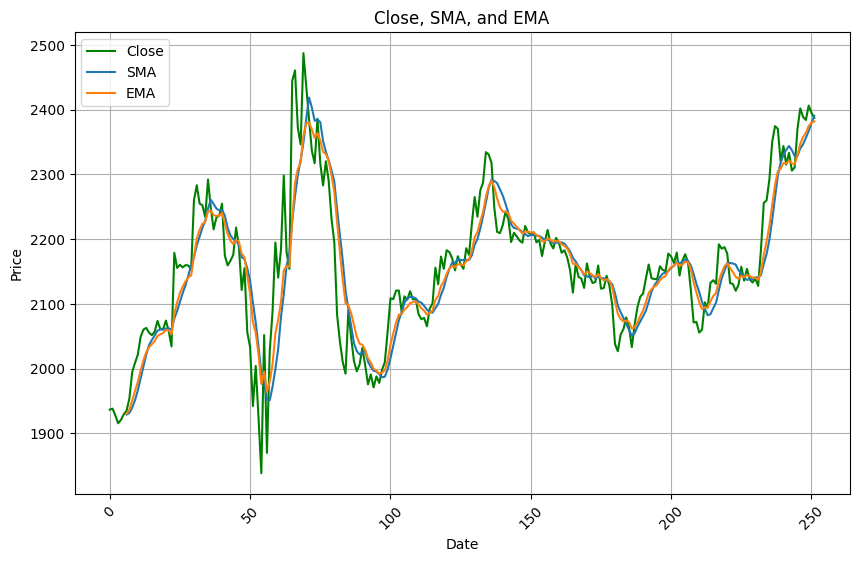

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label='Close', color='green')
plt.plot(data.index, data['SMA'], label='SMA')
plt.plot(data.index, data['EMA'], label='EMA')
plt.title('Close, SMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<h3>3. Moving Average Convergance Divergance MACD</h3>

This indicator I'll use to slowly build up to the buying/selling conditions, this conditions measures the difference between 2 EMA values and then see if crossover happens.<br>
In  MACD the basic idea is to compare short term trends with long term trends, it is a momentum factor and get a bullish or bearish confirmation.<br>
Reference Blog-https://www.investopedia.com/terms/m/macd.asp<br>
the standard is to use EMA 12 and 26 so we will use that along with the 9 day signal line

In [8]:
short_period = 12 #for our EMA 12
long_period = 26 #for our EMA 26
signal_period = 9 # will be using to overlap with MACD histogram to get signaling opportunities
#Note- I've used the ewm- weighted mean function from pandas
#However we could've also coded it from scratch by defining an EMA function to do the same
data['EMA12'] = data['Close'].ewm(span=short_period, min_periods=12).mean()
data['EMA26'] = data['Close'].ewm(span=long_period, min_periods=26).mean()
data['MACD'] = data['EMA12'] - data['EMA26'] #
#for the signal line
data['SignalLine'] = data['MACD'].ewm(span=signal_period, min_periods=9).mean()
data[['MACD', 'SignalLine']] = data[['MACD', 'SignalLine']].round(2)
data=data.round(2)
data
#note that EMA 12 will be NaN for first 11 data points and EMA 26 will be NaN for first 25 


,Date,Open,High,Low,Close,Volume,SMA,EMA,EMA12,EMA26,MACD,SignalLine
0,2020-01-01,1930.00,1939.90,1918.00,1936.55,543035,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,1940.00,1952.60,1930.00,1938.05,663275,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,1937.90,1940.00,1918.75,1927.45,1598825,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,1927.35,1929.40,1911.25,1915.45,683129,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,1919.25,1931.00,1918.00,1920.70,808935,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-28,2405.00,2417.40,2376.05,2388.90,1532477,2346.74,2357.95,2333.95,2278.36,55.59,50.16
248,2020-12-29,2395.00,2403.00,2354.20,2384.30,1749013,2356.60,2364.54,2341.69,2286.20,55.49,51.22
249,2020-12-30,2390.00,2414.65,2376.00,2406.60,1924886,2367.05,2375.06,2351.68,2295.12,56.56,52.29
250,2020-12-31,2396.00,2417.00,2387.00,2395.40,1709836,2379.83,2380.14,2358.41,2302.55,55.86,53.00


Now I'll plot the MACD Histogram and Signal Line 

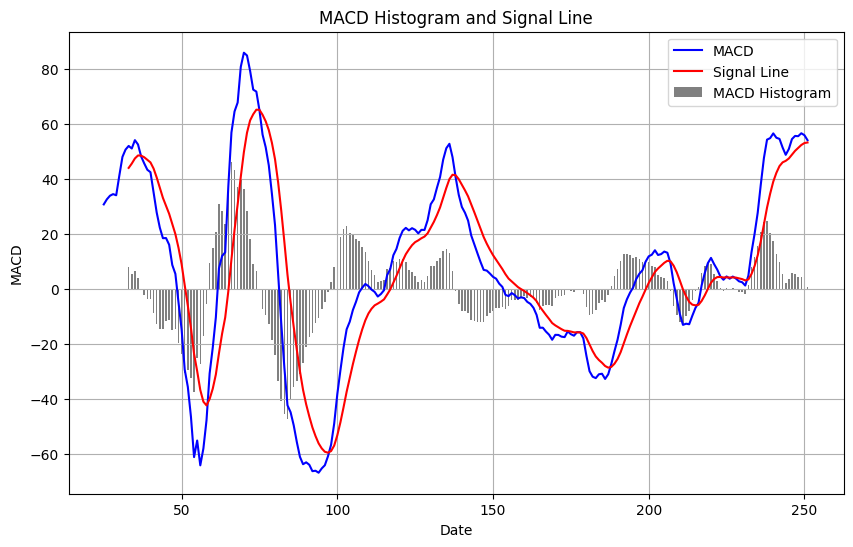

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.bar(data.index, data['MACD'] - data['SignalLine'], width=0.5, color='gray', label='MACD Histogram')
plt.plot(data['SignalLine'], label='Signal Line', color='red')
plt.title('MACD Histogram and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()


Here we can see crossover points and this can potential be an opportunity to buy/sell because of the bullish/bearish market nature as shown

<h3>4.Relative Strenght Index RSI</h3>

RSI is another technical indicator i'll use that will tell us if a stock is overbought or underbought, using the standard 14 day rsi period.<br>
Reference Blog-https://www.investopedia.com/terms/r/rsi.asp <br>
naturally RSI will have NaN values for data points <14
formula used-RSI step one which is RSI=(100-1/(1+RS)) <br>
where RS = avg gains/ avg losses on the lookback period.

In [10]:
rsiperiod=14 #setting the default RSI period
# initialize the lists to store gains and losses
gains = []
losses = []

# we will be taking sucessive differences to store the gains and losses
for i in range(1, len(data['Close'])):
    delta = data['Close'][i] - data['Close'][i - 1]
    if delta > 0: 
        gains.append(delta)
        losses.append(0) # no loss if gain
    else:
        gains.append(0) # no gain if loss
        losses.append(-delta)

RS_list = []

for i in range(rsiperiod, len(data['Close'])):
    avg_gain = (sum(gains[i - rsiperiod : i ]))/rsiperiod
    avg_loss = (sum(losses[i - rsiperiod  : i ])) / rsiperiod
    RS = avg_gain / avg_loss 
    RS_list.append(RS)

RSI = [100 - (100 / (1 + RS)) for RS in RS_list] # list comprehension 
data['RSI'] = [None] * (rsiperiod) + RSI #initialise NaN values to those < rsiperiod
data=data.round(2)
data

,Date,Open,High,Low,Close,Volume,SMA,EMA,EMA12,EMA26,MACD,SignalLine,RSI
0,2020-01-01,1930.00,1939.90,1918.00,1936.55,543035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,1940.00,1952.60,1930.00,1938.05,663275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,1937.90,1940.00,1918.75,1927.45,1598825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,1927.35,1929.40,1911.25,1915.45,683129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,1919.25,1931.00,1918.00,1920.70,808935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-28,2405.00,2417.40,2376.05,2388.90,1532477,2346.74,2357.95,2333.95,2278.36,55.59,50.16,67.41
248,2020-12-29,2395.00,2403.00,2354.20,2384.30,1749013,2356.60,2364.54,2341.69,2286.20,55.49,51.22,66.27
249,2020-12-30,2390.00,2414.65,2376.00,2406.60,1924886,2367.05,2375.06,2351.68,2295.12,56.56,52.29,65.38
250,2020-12-31,2396.00,2417.00,2387.00,2395.40,1709836,2379.83,2380.14,2358.41,2302.55,55.86,53.00,56.92


Plot of the RSI index

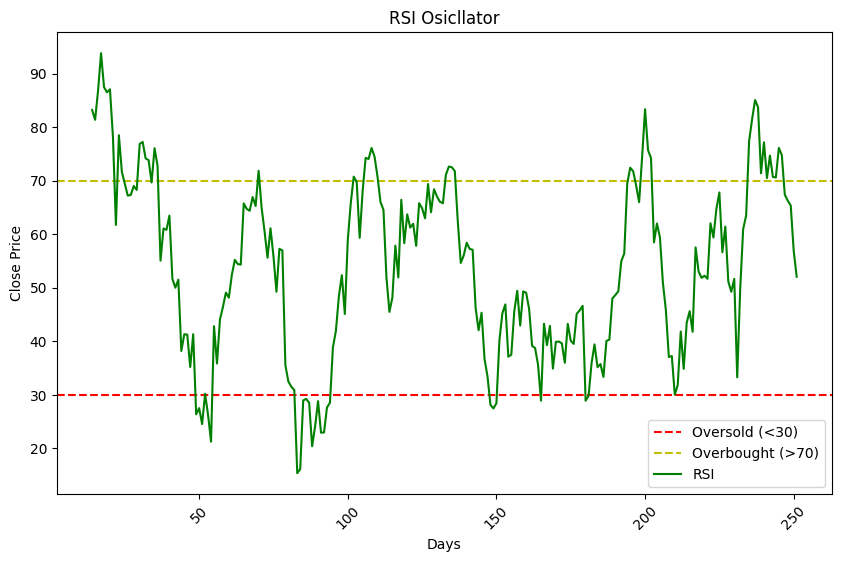

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.axhline(y=30, color='r', linestyle='--', label='Oversold (<30)')
plt.axhline(y=70, color='y', linestyle='--', label='Overbought (>70)')
plt.plot(data.index, data['RSI'], label='RSI', color='green')
plt.title('RSI Osicllator')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<h3> On-Balance Volume OBV </h3>

volume based momentum indicator that will use volume flow to predict the stock price<br>
Reference-https://www.investopedia.com/terms/o/onbalancevolume.asp<br>
logic used
1. If today's closing price is higher than yesterday's closing price, then: Current OBV = Previous OBV + today's volume

2. If today's closing price is lower than yesterday's closing price, then: Current OBV = Previous OBV - today's volume

3. If today's closing price equals yesterday's closing price, then: Current OBV = Previous OBV

In [12]:
#simple code using above logic
# data['OBV'] = 0
# for i in range(1, len(data)):
#     if data['Close'][i] > data['Close'][i-1]:
#         data['OBV'][i] = data['OBV'][i-1] + data['Volume'][i]
#     elif data['Close'][i] < data['Close'][i-1]:
#         data['OBV'][i] = data['OBV'][i-1] - data['Volume'][i]
#     else:
#         data['OBV'][i] =data['OBV'][i-1]

# print(data.to_string(line_width=10000))

above code gives some warning which we can avoid by using the following code instead<br>
using the .loc method for pandas

In [13]:
data['OBV']=0
for i in range(1, len(data)):
    if data['Close'][i] > data['Close'][i-1]:
        data.loc[i, 'OBV'] = data.loc[i-1, 'OBV'] + data.loc[i, 'Volume']
    elif data['Close'][i] < data['Close'][i-1]:
        data.loc[i, 'OBV'] = data.loc[i-1, 'OBV'] - data.loc[i, 'Volume']
    else:
        data.loc[i, 'OBV'] = data.loc[i-1, 'OBV']
data

,Date,Open,High,Low,Close,Volume,SMA,EMA,EMA12,EMA26,MACD,SignalLine,RSI,OBV
0,2020-01-01,1930.00,1939.90,1918.00,1936.55,543035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2020-01-02,1940.00,1952.60,1930.00,1938.05,663275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663275
2,2020-01-03,1937.90,1940.00,1918.75,1927.45,1598825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-935550
3,2020-01-06,1927.35,1929.40,1911.25,1915.45,683129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1618679
4,2020-01-07,1919.25,1931.00,1918.00,1920.70,808935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-809744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-28,2405.00,2417.40,2376.05,2388.90,1532477,2346.74,2357.95,2333.95,2278.36,55.59,50.16,67.41,-195496762
248,2020-12-29,2395.00,2403.00,2354.20,2384.30,1749013,2356.60,2364.54,2341.69,2286.20,55.49,51.22,66.27,-197245775
249,2020-12-30,2390.00,2414.65,2376.00,2406.60,1924886,2367.05,2375.06,2351.68,2295.12,56.56,52.29,65.38,-195320889
250,2020-12-31,2396.00,2417.00,2387.00,2395.40,1709836,2379.83,2380.14,2358.41,2302.55,55.86,53.00,56.92,-197030725


graph for OBV

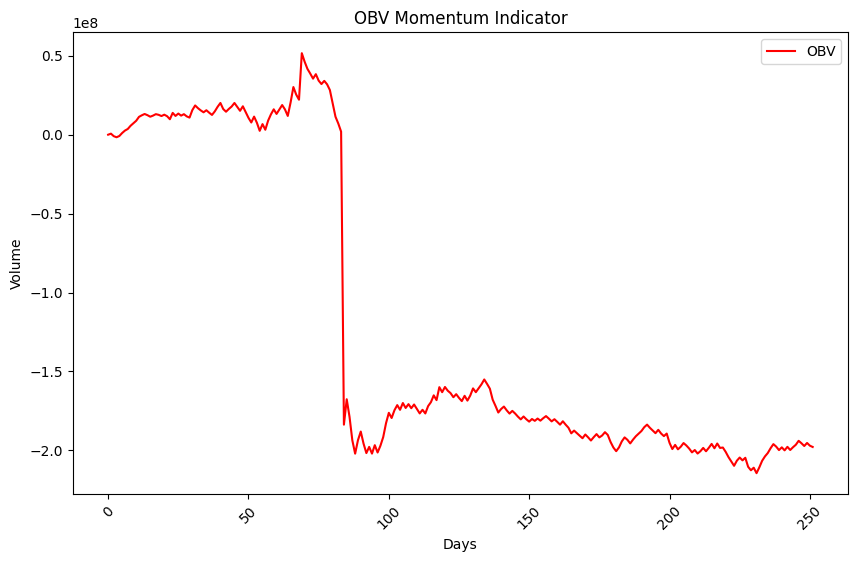

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['OBV'], label='OBV', color='red')
plt.title('OBV Momentum Indicator')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

on 6-7 may 2020 we see an insane change in the volume traded

showing the OBV change 

In [15]:
data['Date'] = pd.to_datetime(data['Date'])
dates_of_interest = pd.to_datetime(['2020-05-06', '2020-05-7'])
filtered_data = data[data['Date'].isin(dates_of_interest)]
filtered_data


,Date,Open,High,Low,Close,Volume,SMA,EMA,EMA12,EMA26,MACD,SignalLine,RSI,OBV
83,2020-05-06,2049.95,2073.0,2000.0,2010.20,5127656,2167.36,2137.04,2191.12,2219.76,-28.64,17.02,15.39,1945086
84,2020-05-07,1950.10,2007.0,1902.0,1992.05,185669922,2120.44,2100.79,2160.49,2202.87,-42.37,5.14,16.17,-183724836


<h2>New Features for these 5 indicators </h2>

The first feature i would like to add is the no of crossovers that the two Moving Averages have ie the SMA and the EMA. i'll code this feature and let's call it the Moving average Crossover Count 
<h3>1.Moving Average CrossOver Count MACC<h3>

code is simple we'll check if the short term and long term MAs form and X shape meaning they have crossed over

In [16]:
def MAintersectionpoints(ema, sma):
    intersectionpoints = []
    for i in range(1, len(ema)):
        if (ema[i] >= sma[i] and ema[i - 1] <= sma[i - 1]) or (ema[i] <= sma[i] and ema[i - 1] >= sma[i - 1]):
            intersectionpoints.append((i, ema[i]))  # intersection point
    return intersectionpoints
crosspts=MAintersectionpoints(data['EMA'],data['SMA'])
print(crosspts)
print('crossover count is: ',end='')
print(len(crosspts))

[(14, 2032.82), (23, 2084.52), (28, 2141.08), (30, 2173.07), (34, 2226.48), (45, 2198.7), (49, 2142.93), (55, 1995.13), (63, 2158.68), (65, 2229.38), (68, 2317.98), (69, 2360.38), (70, 2379.31), (85, 2097.95), (104, 2084.36), (115, 2089.54), (122, 2158.66), (128, 2168.55), (136, 2290.79), (143, 2228.71), (146, 2213.8), (148, 2211.85), (153, 2204.6), (156, 2201.12), (161, 2192.26), (168, 2152.43), (176, 2136.34), (177, 2138.13), (179, 2126.41), (184, 2074.39), (194, 2126.56), (199, 2151.78), (201, 2158.62), (212, 2094.46), (220, 2162.89), (226, 2141.52), (230, 2140.25), (232, 2148.89), (239, 2309.0), (245, 2329.43), (251, 2381.99)]
crossover count is: 41


following plot for visualization

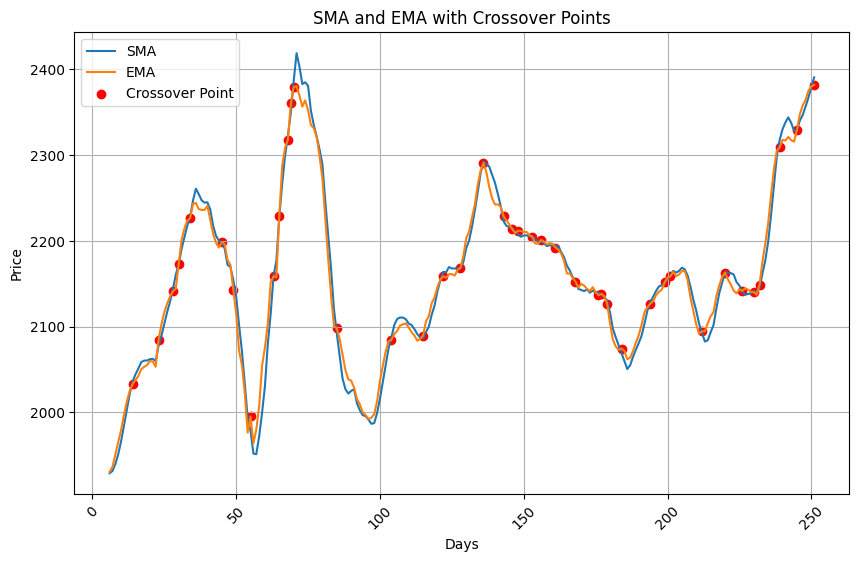

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data.index, data['SMA'], label='SMA')
plt.plot(data.index, data['EMA'], label='EMA')
plt.scatter([date for date, _ in crosspts], [price for _, price in crosspts], color='red', label='Crossover Point')
plt.title('SMA and EMA with Crossover Points')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


next feature I'll add is the OBV rate of change which will give us some insight about the ROC of the volume and be a potential leading indicator

<h3>2.On Balance Volume Rate Of Change OBVROC </h3>

In [18]:
obvroc = [0]
for i in range(1,len(data['OBV'])):
    percentagechange = (data['OBV'][i] - data['OBV'][i - 1])/ data['OBV'][i - 1] * 100 if data['OBV'][i - 1] != 0 else None
    obvroc.append(percentagechange)

data['OBVROC'] = obvroc

for i in range(len(data)):
    obv = data['OBV'][i]
    obvroc = data['OBVROC'][i]
    print(f'OBV: {obv}, OBVROC: {obvroc.round(2)}') # format like this



OBV: 0, OBVROC: 0.0
OBV: 663275, OBVROC: nan
OBV: -935550, OBVROC: -241.05
OBV: -1618679, OBVROC: 73.02
OBV: -809744, OBVROC: -49.98
OBV: 1079941, OBVROC: -233.37
OBV: 2624275, OBVROC: 143.0
OBV: 3627611, OBVROC: 38.23
OBV: 5667700, OBVROC: 56.24
OBV: 7278437, OBVROC: 28.42
OBV: 8837928, OBVROC: 21.43
OBV: 11306886, OBVROC: 27.94
OBV: 12301605, OBVROC: 8.8
OBV: 13131004, OBVROC: 6.74
OBV: 12381004, OBVROC: -5.71
OBV: 11397835, OBVROC: -7.94
OBV: 12105852, OBVROC: 6.21
OBV: 13020845, OBVROC: 7.56
OBV: 12591533, OBVROC: -3.3
OBV: 11814481, OBVROC: -6.17
OBV: 12687914, OBVROC: 7.39
OBV: 11735146, OBVROC: -7.51
OBV: 9804312, OBVROC: -16.45
OBV: 13816854, OBVROC: 40.93
OBV: 11884733, OBVROC: -13.98
OBV: 13399101, OBVROC: 12.74
OBV: 12096985, OBVROC: -9.72
OBV: 13005137, OBVROC: 7.51
OBV: 11615290, OBVROC: -10.69
OBV: 10837784, OBVROC: -6.69
OBV: 15591109, OBVROC: 43.86
OBV: 18541516, OBVROC: 18.92
OBV: 16812865, OBVROC: -9.32
OBV: 15392014, OBVROC: -8.45
OBV: 14197409, OBVROC: -7.76
OBV: 15

plotting OBV and OBVROC using two axis methhod<br>
Referrence-https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=This%20post%20describes%20how%20to,Y%20axis%20on%20this%20twin.

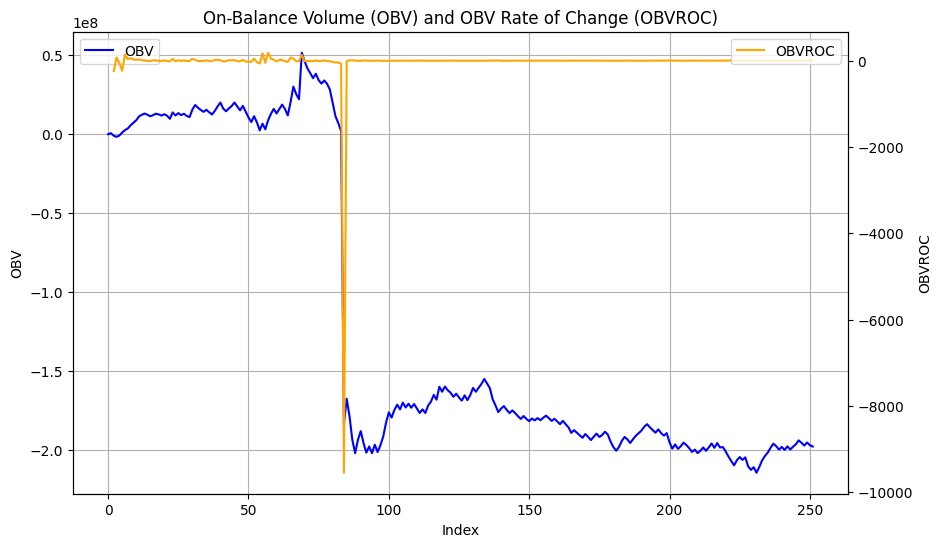

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index, data['OBV'], label='OBV', color='blue')
ax2 = ax.twinx()
ax2.plot(data.index, data['OBVROC'], label='OBVROC', color='orange')
ax.set_xlabel('Index')
ax.set_ylabel('OBV')
ax2.set_ylabel('OBVROC')
ax.set_title('On-Balance Volume (OBV) and OBV Rate of Change (OBVROC)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True)
plt.show()


<h1>BUY SELLL HOLD </h1>

logic that i'll use firstly is simple if else. based on our indicators <br>
Reference - https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp#:~:text=When%20the%20price%20crosses%20above,as%20the%20chart%20above%20shows.

pseudocode for logic<br>
if the short period ma is > long term ma then we will buy ie we will compare ema12 and ema 26, for days before n<26 <br>
i will compare sma and ema and do the same since ema gives weightage to more recent stock prices

In [20]:
signals=[]
for i in range(len(data)):
    if (data['EMA'][i] > data['SMA'][i]) or (data['EMA12'][i]>data['EMA26'][i]):
        signals.append('Buy')
    elif (data['EMA'][i] < data['SMA'][i]) or data['EMA12'][i]<data['EMA26'][i]:
        signals.append('Sell')
    else:
        signals.append('Hold')
data['Signal'] = signals
# now rechecking with other indicators
for i in range(len(data)):
    if data['RSI'][i] < 30:  # < 30 indicates oversold
        data.loc[i,'Signal']='Buy'
    elif data['RSI'][i] > 70:  #> 70 indicates overbought
        data.loc[i,'Signal']='Sell'
# Adjusting hold signals
for i in range(1, len(data)):
    if data['Signal'][i - 1] == 'Buy' or data['Signal'][i - 1] == 'Sell':
        data.loc[i, 'Signal'] = 'Hold'

data

,Date,Open,High,Low,Close,Volume,SMA,EMA,EMA12,EMA26,MACD,SignalLine,RSI,OBV,OBVROC,Signal
0,2020-01-01,1930.00,1939.90,1918.00,1936.55,543035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,Hold
1,2020-01-02,1940.00,1952.60,1930.00,1938.05,663275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663275,NaN,Hold
2,2020-01-03,1937.90,1940.00,1918.75,1927.45,1598825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-935550,-241.050092,Hold
3,2020-01-06,1927.35,1929.40,1911.25,1915.45,683129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1618679,73.018973,Hold
4,2020-01-07,1919.25,1931.00,1918.00,1920.70,808935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-809744,-49.975010,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-28,2405.00,2417.40,2376.05,2388.90,1532477,2346.74,2357.95,2333.95,2278.36,55.59,50.16,67.41,-195496762,0.790082,Hold
248,2020-12-29,2395.00,2403.00,2354.20,2384.30,1749013,2356.60,2364.54,2341.69,2286.20,55.49,51.22,66.27,-197245775,0.894651,Buy
249,2020-12-30,2390.00,2414.65,2376.00,2406.60,1924886,2367.05,2375.06,2351.68,2295.12,56.56,52.29,65.38,-195320889,-0.975882,Hold
250,2020-12-31,2396.00,2417.00,2387.00,2395.40,1709836,2379.83,2380.14,2358.41,2302.55,55.86,53.00,56.92,-197030725,0.875398,Buy


graph to show how this elementary logic works for buying selling holding

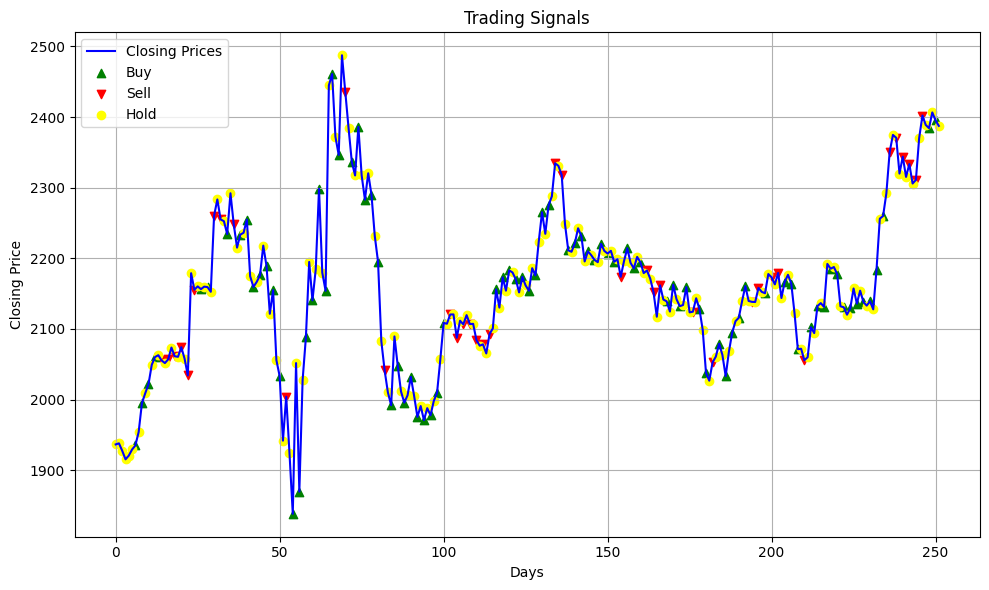

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Prices', color='blue')
plt.scatter(data.index[data['Signal'] == 'Buy'], 
            data['Close'][data['Signal'] == 'Buy'], 
            marker='^', color='green', label='Buy')
plt.scatter(data.index[data['Signal'] == 'Sell'], 
            data['Close'][data['Signal'] == 'Sell'], 
            marker='v', color='red', label='Sell')
plt.scatter(data.index[data['Signal'] == 'Hold'], 
            data['Close'][data['Signal'] == 'Hold'], 
            marker='o', color='yellow', label='Hold')
plt.title('Trading Signals')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Trying to backtest my returns using my logic 

In [22]:
import pandas as pd
import numpy as np

initialcash = 100000 #lets start with 1 lakh inr
cash = initialcash
shares = 0

for i in range(len(data)):
    if data['Signal'][i] == 'Buy':
        sharestobuy = int(cash / data['Close'][i]) # i buy all shares witht the money i have
        shares += sharestobuy
        cash = cash- sharestobuy * data['Close'][i] # so my cash would be deducted
    elif data['Signal'][i] == 'Sell':
        cash += shares * data['Close'][i] #the cash i have after selling
        shares = 0

# Calculate final equity
finalequity = cash + shares * data['Close'][len(data)-1] #getting last close value into my shares with my leftover cash if any

# Calculate total return
totalreturn = (finalequity - initialcash) / initialcash * 100

print("Initial Cash:", initialcash)
print("Final Equity:", finalequity)
print("Total Return (%):", totalreturn.round(2))


Initial Cash: 100000
Final Equity: 137147.0
Total Return (%): 37.15


<h1>Multivariable Logistic Model</h1><br>
i will train a mode so that i follows buy sell hold on the basis of previous data , there are many models like Logistic regression , random forest classifier but here i will use a simple easy to undestand classifier known as KNN

videos referred-https://youtu.be/J_LnPL3Qg70 , https://youtu.be/0p0o5cmgLdE<br>
The model that I'll be using is <br>
<h3>KNN or K-Nearest Neighbors</h3>



referred github/blog code https://blog.quantinsti.com/machine-learning-k-nearest-neighbors-knn-algorithm-python/ <br>
KNN video-https://youtu.be/4HKqjENq9OU

code referred -https://github.com/sammanthp007/Stock-Price-Prediction-Using-KNN-Algorithm/blob/master/knnAlgorithm.py

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
data.dropna(inplace=True)
x = data[['SMA', 'EMA', 'MACD', 'RSI', 'OBV']]
y = data['Signal']  # contains our buy and sell data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0) #training the 80% and testing 20%

model = KNeighborsClassifier(n_neighbors=3) # for 3NN
model.fit(xtrain, ytrain)

train_accuracy = model.score(xtrain, ytrain)
test_accuracy = model.score(xtest, ytest)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

y_pred = model.predict(xtest)
print(classification_report(ytest, y_pred))


Training Accuracy: 0.8
Testing Accuracy: 0.5909090909090909
              precision    recall  f1-score   support

         Buy       0.55      0.67      0.60        18
        Hold       0.61      0.58      0.59        19
        Sell       0.75      0.43      0.55         7

    accuracy                           0.59        44
   macro avg       0.64      0.56      0.58        44
weighted avg       0.61      0.59      0.59        44



now I will try to code the same from scratch <br>
note ideally we should do dimension reduction and try to get a plot using seaborn but i couldn't find a convincing source online

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# using logic for knn which states that we find the n nearest neighbours, ill use euclidean distance formula
def knn(xtrain, ytrain, xtest, n_neighbors=3):
    y_pred = []
    for test_point in xtest:
        distances = []
        for train_point in xtrain:
            distance = np.sqrt(np.sum((test_point - train_point) ** 2))  #calculates the sum of indices of all dimensions up to that point
            distances.append(distance)
        nearest_indices = np.argsort(distances)[:n_neighbors] #returns the sorted indices 
        nearestlabels = [ytrain[i] for i in nearest_indices]
        pred_label = max(set(nearestlabels), key=nearestlabels.count)
        y_pred.append(pred_label)
    return np.array(y_pred)

data.dropna(inplace=True)

x = data[['SMA', 'EMA', 'MACD', 'RSI', 'OBV']]
y = data['Signal']  # contains our buy and sell  hold data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

y_pred = knn(np.array(xtrain), np.array(ytrain), np.array(xtest), n_neighbors=3)
test_accuracy = np.mean(y_pred == ytest)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print(classification_report(ytest, y_pred))


Training Accuracy: 0.8
Testing Accuracy: 0.5909090909090909
              precision    recall  f1-score   support

         Buy       0.55      0.67      0.60        18
        Hold       0.61      0.58      0.59        19
        Sell       0.75      0.43      0.55         7

    accuracy                           0.59        44
   macro avg       0.64      0.56      0.58        44
weighted avg       0.61      0.59      0.59        44



note-Cannot get AUC ROC score as it need a binary classification but we have 3 ie buy sell hold

trying to show our true positives/true negatives/false positives/false negatives using seaborn<br>
Reference- https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

['Hold' 'Hold' 'Sell' 'Sell' 'Hold' 'Buy' 'Buy' 'Hold' 'Buy' 'Buy' 'Buy'
 'Hold' 'Hold' 'Hold' 'Buy' 'Buy' 'Hold' 'Buy' 'Hold' 'Sell' 'Buy' 'Buy'
 'Sell' 'Buy' 'Hold' 'Buy' 'Hold' 'Buy' 'Hold' 'Hold' 'Buy' 'Buy' 'Hold'
 'Buy' 'Hold' 'Buy' 'Hold' 'Hold' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold' 'Buy']
185    Hold
107    Hold
104    Sell
194    Sell
195    Hold
176    Sell
96      Buy
186     Buy
251    Hold
168     Buy
182    Sell
38      Buy
123    Hold
201    Hold
235    Hold
224     Buy
234     Buy
129    Hold
139    Hold
108    Sell
88      Buy
45     Hold
190     Buy
97     Hold
70     Sell
163    Hold
134    Sell
94      Buy
41     Hold
51     Hold
212     Buy
48      Buy
172     Buy
40      Buy
157    Hold
192     Buy
169    Hold
177    Hold
232     Buy
188     Buy
99     Hold
66      Buy
122     Buy
191    Hold
Name: Signal, dtype: object


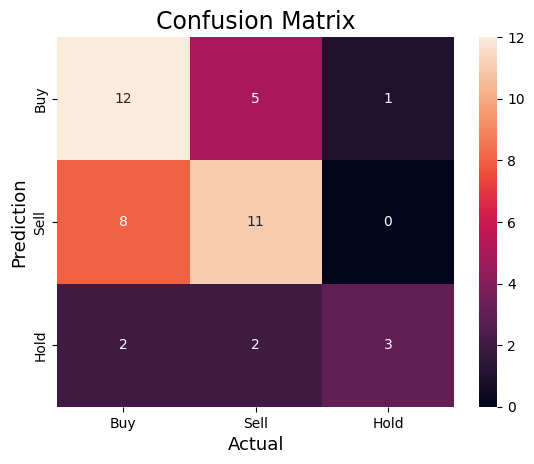

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print(y_pred)
print(ytest)
actual =ytest
predicted = y_pred
cm = confusion_matrix(actual,predicted)
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Buy','Sell','Hold'],
			yticklabels=['Buy','Sell','Hold'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()


<center><h2>--------Task 2 complete--------</h2></center>